In [1]:
import datetime
from dateutil import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

mpl.rcParams["figure.dpi"] = 150

In [2]:
# data
client_tr = pd.read_csv("../data/client.train.csv", parse_dates=["birthdate"])
orders = pd.read_csv("../data/orders.csv")
products = pd.read_csv("../data/product.csv")
client_tr

,client_id,birthdate,state,gender,is_churn
0,cx05072,1972-03-22,st25,cg2,False
1,cx03836,1966-08-14,st15,cg1,False
2,cx08472,1954-08-07,st15,cg1,False
3,cx12946,1955-11-16,st15,cg1,False
4,cx19045,1958-10-25,st15,cg2,False
...,...,...,...,...,...
23287,cx05312,1981-08-29,st18,cg1,False
23288,cx02434,1997-03-15,st04,cg2,False
23289,cx16024,1950-10-09,st11,cg1,False
23290,cx11285,1976-07-03,st11,cg2,False


## Variables

- clientId: único para cada linha (não representativa pra esse dataset, mas serve de relação com as outras tabelas)
- birthdate: data de nascimento, pode ser utilizada para indicar quantos anos a pessoa tem no momento da análise
- state: estado de onde a pessoa fez o cadastro
- gender: gênero
- is_churn: target

In [3]:
client_tr["birth_year"] = client_tr["birthdate"].dt.year
client_tr["age"] = datetime.date.today().year - client_tr["birth_year"]

In [4]:
client_tr

,client_id,birthdate,state,gender,is_churn,birth_year,age
0,cx05072,1972-03-22,st25,cg2,False,1972,50
1,cx03836,1966-08-14,st15,cg1,False,1966,56
2,cx08472,1954-08-07,st15,cg1,False,1954,68
3,cx12946,1955-11-16,st15,cg1,False,1955,67
4,cx19045,1958-10-25,st15,cg2,False,1958,64
...,...,...,...,...,...,...,...
23287,cx05312,1981-08-29,st18,cg1,False,1981,41
23288,cx02434,1997-03-15,st04,cg2,False,1997,25
23289,cx16024,1950-10-09,st11,cg1,False,1950,72
23290,cx11285,1976-07-03,st11,cg2,False,1976,46


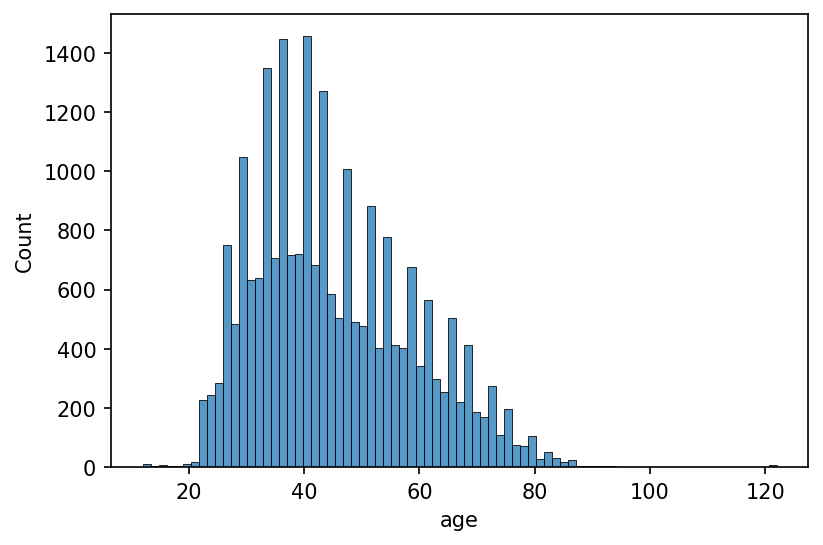

In [5]:
_ = sns.histplot(x="age", data=client_tr)
plt.show()

In [6]:
client_tr.describe()

,birth_year,age
count,23292.000000,23292.000000
mean,1976.765585,45.234415
std,13.702858,13.702858
min,1900.000000,12.000000
25%,1967.000000,35.000000
50%,1979.000000,43.000000
75%,1987.000000,55.000000
max,2010.000000,122.000000


In [7]:
client_more_100_y = client_tr[client_tr["age"] > 100]["client_id"].values

In [8]:
# join orders + product
orders_product_df = pd.merge(left=orders, right=products, on="product_id", how="left")

In [9]:
orders_product_df[orders_product_df["client_id"].isin(client_more_100_y)].sort_values(["client_id", "datetime"])

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
49099,ox013946,cx07001,px04338,2019-05-07 07:11:00,1.0,346.66,pm05,NaN,15.0,st21,dv4,sc04,mk37,mk37:077,mk37:077:103,mk37:077:103:103,mk37:077:103:103:01927
49101,ox071449,cx07001,px04239,2019-11-20 05:45:00,1.0,94.90,pm10,1.0,2.0,st21,dv4,sc04,mk37,mk37:030,mk37:030:452,mk37:030:452:103,mk37:030:452:103:10354
49100,ox071449,cx07001,px04239,2019-11-20 11:07:00,1.0,-94.90,pm05,NaN,NaN,st21,dv4,sc04,mk37,mk37:030,mk37:030:452,mk37:030:452:103,mk37:030:452:103:10354
49102,ox070740,cx07001,px04239,2019-11-20 11:07:00,1.0,94.90,pm04,1.0,2.0,st21,dv7,sc07,mk37,mk37:030,mk37:030:452,mk37:030:452:103,mk37:030:452:103:10354
49103,ox038219,cx07001,px08568,2019-11-24 16:33:00,1.0,5499.00,pm05,NaN,20.0,st07,dv9,sc08,mk31,mk31:088,mk31:088:311,mk31:088:311:103,mk31:088:311:103:07340
49104,ox037283,cx07001,px08902,2019-11-24 16:56:00,1.0,2999.04,pm05,NaN,8.0,st07,dv9,sc08,mk16,mk16:028,mk16:028:103,mk16:028:103:103,mk16:028:103:103:09282
49105,ox063144,cx07001,px09187,2019-12-12 16:18:00,1.0,3149.00,pm02,8.0,11.0,st21,dv7,sc07,mk50,mk50:244,mk50:244:187,mk50:244:187:103,mk50:244:187:103:02191
49106,ox063144,cx07001,px09187,2019-12-12 16:54:00,1.0,-3149.00,pm02,8.0,11.0,st21,dv7,sc07,mk50,mk50:244,mk50:244:187,mk50:244:187:103,mk50:244:187:103:02191
50454,ox120062,cx08664,px02254,2019-03-20 08:23:00,1.0,209.99,pm05,NaN,10.0,st25,dv4,sc04,mk37,mk37:075,mk37:075:103,mk37:075:103:103,mk37:075:103:103:06762
50455,ox005999,cx08664,px09718,2019-03-20 08:41:00,1.0,72.99,pm05,NaN,2.0,st25,dv4,sc04,mk37,mk37:030,mk37:030:103,mk37:030:103:103,mk37:030:103:103:03184


In [10]:
client_tr[client_tr["age"] < 15]

,client_id,birthdate,state,gender,is_churn,birth_year,age
5971,cx05146,2009-01-10,st15,cg2,False,2009,13
7052,cx19766,2008-01-24,st25,cg2,False,2008,14
7622,cx35679,2009-04-04,st15,cg1,False,2009,13
8594,cx01312,2010-01-11,st15,cg1,True,2010,12
9283,cx28168,2009-01-01,st25,cg1,False,2009,13
10373,cx11605,2008-03-28,st03,cg2,True,2008,14
11509,cx35284,2009-06-01,st04,cg2,False,2009,13
11677,cx33246,2010-12-31,st25,cg1,False,2010,12
12276,cx03012,2010-04-10,st15,cg2,False,2010,12
12784,cx06016,2009-09-25,st01,cg1,False,2009,13


In [11]:
client_tr

,client_id,birthdate,state,gender,is_churn,birth_year,age
0,cx05072,1972-03-22,st25,cg2,False,1972,50
1,cx03836,1966-08-14,st15,cg1,False,1966,56
2,cx08472,1954-08-07,st15,cg1,False,1954,68
3,cx12946,1955-11-16,st15,cg1,False,1955,67
4,cx19045,1958-10-25,st15,cg2,False,1958,64
...,...,...,...,...,...,...,...
23287,cx05312,1981-08-29,st18,cg1,False,1981,41
23288,cx02434,1997-03-15,st04,cg2,False,1997,25
23289,cx16024,1950-10-09,st11,cg1,False,1950,72
23290,cx11285,1976-07-03,st11,cg2,False,1976,46


- Pode ser interessante encodar a variável de idade em grupos com o qcut e investigar o valor de compras

In [12]:
orders.isnull().sum()

order_id               0
client_id              0
product_id             0
datetime               0
units                  0
price                  0
payment_method         0
installments      131927
delivery_days      78830
delivery_state         0
device                 0
source                 0
dtype: int64

In [13]:
78830

78830

In [14]:
orders[(orders["payment_method"] == "pm05") & ~(orders["delivery_days"].isnull())]

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
23,ox043196,cx19045,px10348,2019-03-16 14:37:00,1.0,39.90,pm05,NaN,1.0,st15,dv3,sc12
38,ox038162,cx06182,px09461,2019-03-25 17:00:00,4.0,20.87,pm05,NaN,2.0,st15,dv4,sc04
39,ox028666,cx06182,px12332,2019-06-05 04:43:00,1.0,2222.91,pm05,NaN,2.0,st15,dv5,sc11
73,ox083030,cx32280,px09221,2019-12-05 15:12:00,1.0,529.00,pm05,NaN,8.0,st07,dv9,sc08
74,ox129953,cx08351,px03498,2019-01-05 13:04:00,1.0,749.90,pm05,NaN,8.0,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...,...
168434,ox080739,cx06266,px11688,2019-11-29 18:49:00,1.0,899.00,pm05,NaN,4.0,st07,dv9,sc08
168449,ox104305,cx11285,px06119,2019-05-17 04:03:00,1.0,42.19,pm05,NaN,13.0,st11,dv3,sc12
168450,ox104305,cx11285,px04346,2019-05-17 04:03:00,1.0,31.61,pm05,NaN,13.0,st11,dv3,sc12
168451,ox104305,cx11285,px09786,2019-05-17 04:03:00,1.0,42.19,pm05,NaN,13.0,st11,dv3,sc12


- Todos os payments pm05 não posuem installments, gerando missing values, e 78k não possuem delivery days. Acredito que seja compras feitas em débito
- Vou encodar a média de delivery_days por client por payment_method. Sem precisar tratar os missings

In [15]:
orders["payment_method"].value_counts()

pm05    131927
pm02     14182
pm14      7068
pm10      5337
pm09      3096
pm03      2539
pm06      1728
pm13      1154
pm04       895
pm12       227
pm01       214
pm07        60
pm08        37
pm11         8
Name: payment_method, dtype: int64

In [16]:
client = "cx17826"

In [17]:
client_tr[client_tr["client_id"] == client]

,client_id,birthdate,state,gender,is_churn,birth_year,age
39,cx17826,1951-09-28,st25,cg1,False,1951,71


In [18]:
orders[~orders["installments"].isnull()]

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
40,ox095115,cx06182,px07463,2019-09-18 10:27:00,1.0,799.20,pm14,10.0,1.0,st15,dv3,sc09
112,ox026209,cx19443,px00557,2019-09-03 19:19:00,1.0,189.05,pm02,1.0,7.0,st15,dv3,sc09
116,ox053945,cx01320,px09710,2019-08-15 13:56:00,1.0,349.90,pm09,4.0,0.0,st25,dv4,sc04
119,ox045760,cx01320,px09710,2019-08-15 14:30:00,1.0,332.41,pm04,1.0,0.0,st25,dv4,sc04
120,ox008514,cx01320,px01037,2019-10-04 21:44:00,1.0,37.00,pm04,1.0,2.0,st25,dv4,sc04
...,...,...,...,...,...,...,...,...,...,...,...,...
168421,ox072026,cx01686,px01444,2019-10-12 11:51:00,3.0,51.90,pm14,5.0,2.0,st24,dv3,sc12
168467,ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
168468,ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
168470,ox126589,cx15796,px12043,2019-09-07 04:39:00,1.0,15.00,pm10,1.0,0.0,st01,dv3,sc12


- installments missings vai ser tratados como zero

In [19]:
client_tr["state"].value_counts()

st15    8201
st25    3501
st21    2135
st04    1646
st22    1230
st08    1021
st16     990
st01     786
st03     651
st09     505
st24     477
st02     430
st18     426
st13     356
st26     309
st11     229
st23     203
st12      68
st17      52
st05      36
st06      28
st20       4
st19       2
st14       2
st07       2
st27       1
st10       1
Name: state, dtype: int64

In [20]:
client_tr

,client_id,birthdate,state,gender,is_churn,birth_year,age
0,cx05072,1972-03-22,st25,cg2,False,1972,50
1,cx03836,1966-08-14,st15,cg1,False,1966,56
2,cx08472,1954-08-07,st15,cg1,False,1954,68
3,cx12946,1955-11-16,st15,cg1,False,1955,67
4,cx19045,1958-10-25,st15,cg2,False,1958,64
...,...,...,...,...,...,...,...
23287,cx05312,1981-08-29,st18,cg1,False,1981,41
23288,cx02434,1997-03-15,st04,cg2,False,1997,25
23289,cx16024,1950-10-09,st11,cg1,False,1950,72
23290,cx11285,1976-07-03,st11,cg2,False,1976,46


In [21]:
orders

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08
...,...,...,...,...,...,...,...,...,...,...,...,...
168467,ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11
168468,ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11
168469,ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08
168470,ox126589,cx15796,px12043,2019-09-07 04:39:00,1.0,15.00,pm10,1.0,0.0,st01,dv3,sc12


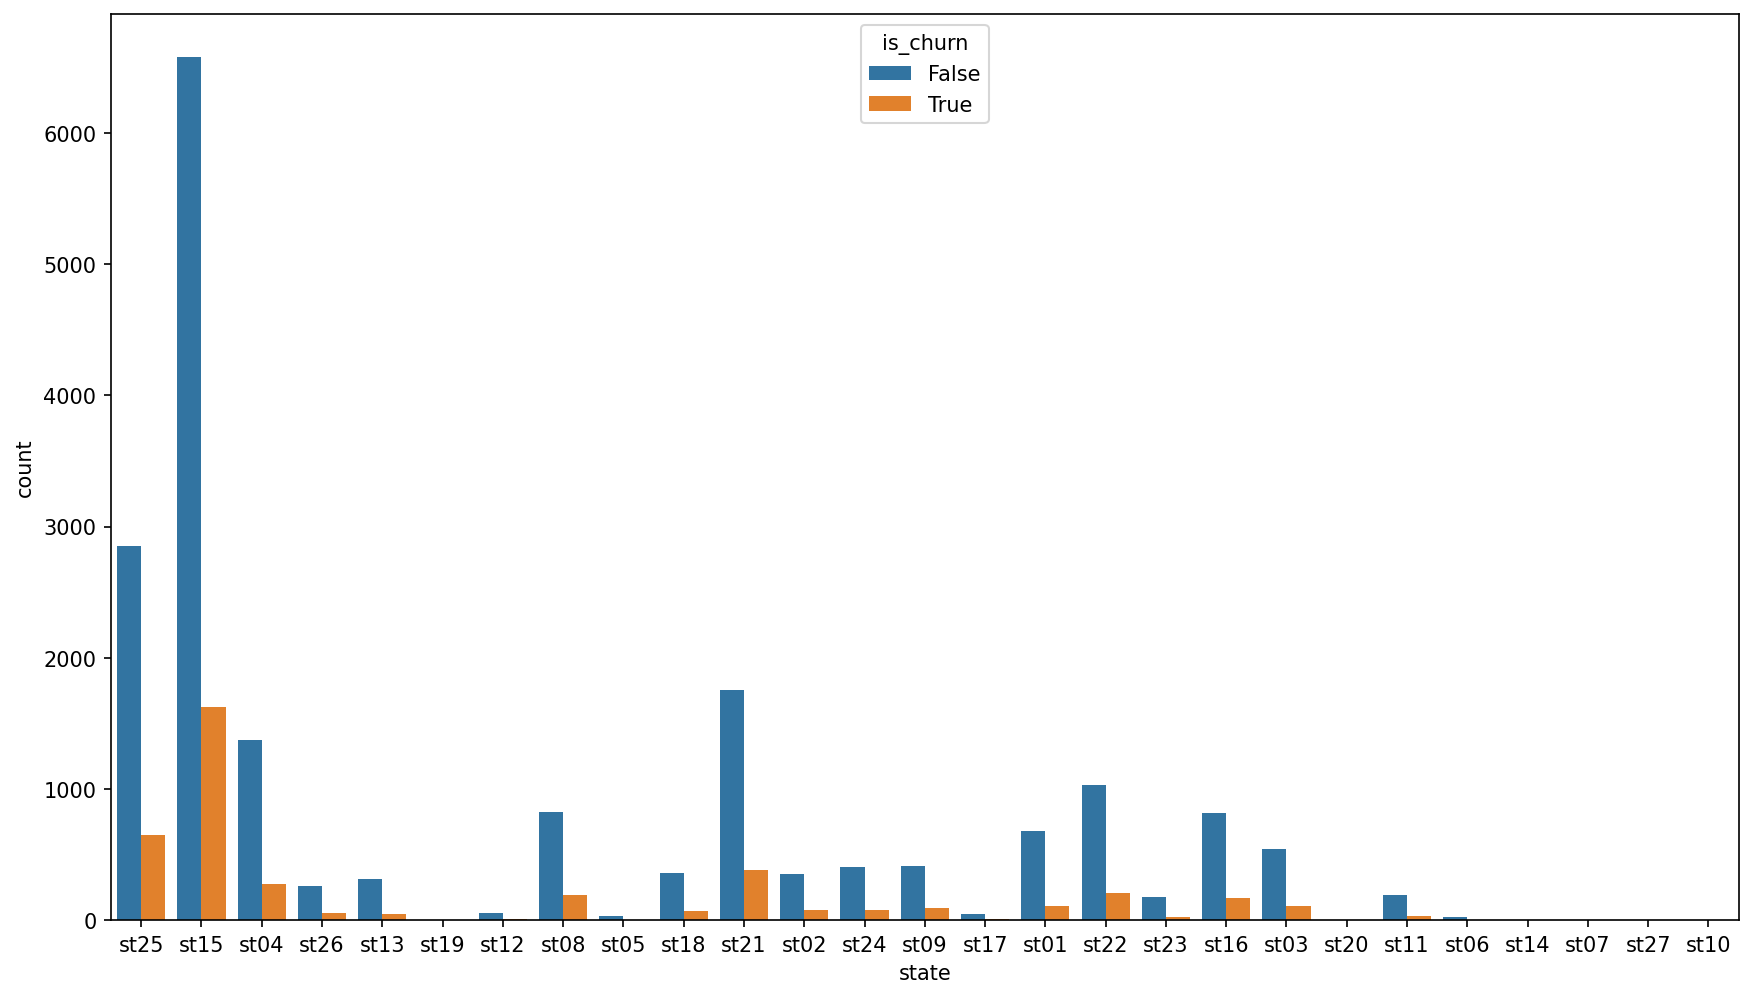

In [27]:
fig_size = (14, 8)
fig, ax = plt.subplots(figsize=fig_size)

_ = sns.countplot(x="state", data=client_tr, hue="is_churn", ax=ax)

In [29]:
orders.value_counts(['delivery_state'])

delivery_state
st07              97820
st15              22286
st25               9174
st21               6894
st22               4595
st16               4346
st04               3447
st01               3407
st03               2579
st24               2155
st08               1924
st09               1869
st26               1802
st18               1432
st13               1269
st02                860
st11                859
st23                843
st12                336
st17                312
st05                183
st06                 66
st27                  5
st14                  4
st19                  3
st10                  2
dtype: int64

- birthdate -> age
- state -> orders_by_state
- client_id -> dropped
- gender -> fica gender
- feature_engineering

In [31]:
client_tr.value_counts(["gender", "is_churn"])

gender  is_churn
cg1     False       10632
cg2     False        8453
cg1     True         2247
cg2     True         1960
dtype: int64

- test between gender and churn to see if there is significant difference

In [32]:
orders_product_df

,order_id,client_id,product_id,datetime,units,price,payment_method,installments,delivery_days,delivery_state,device,source,category_lv0,category_lv1,category_lv2,category_lv3,category_lv4
0,ox008433,cx05072,px04611,2019-10-07 15:20:00,1.0,49.90,pm05,NaN,NaN,st07,dv9,sc08,mk04,mk04:128,mk04:128:103,mk04:128:103:103,mk04:128:103:103:03294
1,ox070389,cx05072,px12305,2019-10-11 17:42:00,1.0,69.90,pm05,NaN,NaN,st07,dv9,sc08,mk04,mk04:292,mk04:292:246,mk04:292:246:103,mk04:292:246:103:04338
2,ox061137,cx06840,px07033,2019-01-19 13:09:00,1.0,35.90,pm05,NaN,NaN,st07,dv9,sc08,mk05,mk05:072,mk05:072:256,mk05:072:256:182,mk05:072:256:182:09643
3,ox061137,cx06840,px05992,2019-01-19 13:09:00,3.0,35.90,pm05,NaN,NaN,st07,dv9,sc08,mk05,mk05:072,mk05:072:056,mk05:072:056:182,mk05:072:056:182:07587
4,ox038612,cx06840,px10040,2019-04-18 14:36:00,1.0,39.00,pm05,NaN,NaN,st07,dv9,sc08,mk17,mk17:251,mk17:251:555,mk17:251:555:070,mk17:251:555:070:01336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168467,ox081422,cx15796,px08541,2019-06-25 11:50:00,1.0,246.50,pm14,10.0,21.0,st01,dv5,sc11,mk22,mk22:098,mk22:098:486,mk22:098:486:103,mk22:098:486:103:07627
168468,ox081422,cx15796,px05166,2019-06-25 11:50:00,1.0,652.50,pm14,10.0,21.0,st01,dv5,sc11,mk22,mk22:098,mk22:098:272,mk22:098:272:103,mk22:098:272:103:04925
168469,ox128219,cx15796,px12043,2019-09-06 11:45:00,2.0,15.00,pm05,NaN,NaN,st07,dv9,sc08,mk22,mk22:100,mk22:100:277,mk22:100:277:103,mk22:100:277:103:04947
168470,ox126589,cx15796,px12043,2019-09-07 04:39:00,1.0,15.00,pm10,1.0,0.0,st01,dv3,sc12,mk22,mk22:100,mk22:100:277,mk22:100:277:103,mk22:100:277:103:04947
